In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup

### Objective
- Clean the dataset
- Transform the dataset for easier analysis and visualisation
- If the data ready save as csv, and lets move out to tableau for interactive visualization dashboard

In [2]:
with open('./data/raw/aki_20230304_120814.xls', 'r') as file:
    soup = BeautifulSoup(file, 'html.parser')


In [3]:
provinsi = []
td = soup.find_all('td')
for i, data in enumerate(td):
    # print(i, data.get_text())
    if i==0 or i%13==0:
        provinsi.append(data.get_text())
print(provinsi)

['NASIONAL', 'ACEH', 'BALI', 'BANTEN', 'BENGKULU', 'DAERAH ISTIMEWA YOGYAKARTA', 'DI YOGYAKARTA', 'DKI JAKARTA', 'GORONTALO', 'JAMBI', 'JAWA BARAT', 'JAWA TENGAH', 'JAWA TIMUR', 'KALIMANTAN BARAT', 'KALIMANTAN SELATAN', 'KALIMANTAN TENGAH', 'KALIMANTAN TIMUR', 'KALIMANTAN UTARA', 'KEPULAUAN BANGKA BELITUNG', 'KEPULAUAN RIAU', 'LAMPUNG', 'MALUKU', 'MALUKU UTARA', 'NUSA TENGGARA BARAT', 'NUSA TENGGARA TIMUR', 'PAPUA', 'PAPUA BARAT', 'RIAU', 'SULAWESI BARAT', 'SULAWESI SELATAN', 'SULAWESI TENGAH', 'SULAWESI TENGGARA', 'SULAWESI UTARA', 'SUMATERA BARAT', 'SUMATERA SELATAN', 'SUMATERA UTARA']


In [4]:
columns = []
th = soup.find_all('th')
for column in th:
    columns.append(column.get_text())

print(columns[1:])


['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']


In [5]:
angka = [[]]
raw = []
start = 1
end = 13
td = soup.find_all('td')
for data in td:
    raw.append(data.get_text())
raw

['NASIONAL',
 '30,48',
 '32,25',
 '33,89',
 '35,21',
 '38,14',
 '41,11',
 '43,94',
 '47,34',
 '50,69',
 '54,50',
 '54,56',
 '55,37',
 'ACEH',
 '40,49',
 '40,96',
 '41,69',
 '43,34',
 '45,83',
 '46,85',
 '49,80',
 '49,37',
 '57,19',
 '63,62',
 '65,53',
 '66,21',
 'BALI',
 '23,25',
 '24,40',
 '24,75',
 '28,66',
 '31,47',
 '33,02',
 '37,43',
 '37,56',
 '38,83',
 '41,45',
 '44,74',
 '44,97',
 'BANTEN',
 '21,50',
 '24,89',
 '28,36',
 '28,06',
 '30,65',
 '32,45',
 '35,77',
 '36,41',
 '37,41',
 '42,94',
 '41,29',
 '41,74',
 'BENGKULU',
 '23,38',
 '25,52',
 '26,80',
 '30,70',
 '32,18',
 '34,39',
 '37,29',
 '53,36',
 '54,36',
 '40,79',
 '45,74',
 '46,21',
 'DAERAH ISTIMEWA YOGYAKARTA',
 '9,92',
 '13,60',
 '14,55',
 '21,71',
 '21,74',
 '24,68',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '34,26',
 '34,82',
 'DI YOGYAKARTA',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '23,73',
 '28,32',
 '28,71',
 '33,35',
 '0,00',
 '0,00',
 'DKI JAKARTA',
 '21,44',
 '25,14',
 '31,31',
 '31,32',
 '32,55',
 '3

In [6]:
lists= []
for i in raw:
    if re.match('[a-zA-Z\s]+$', i):
        lists.append([])
    else:
        lists[-1].append(i)
print(lists)

[['30,48', '32,25', '33,89', '35,21', '38,14', '41,11', '43,94', '47,34', '50,69', '54,50', '54,56', '55,37'], ['40,49', '40,96', '41,69', '43,34', '45,83', '46,85', '49,80', '49,37', '57,19', '63,62', '65,53', '66,21'], ['23,25', '24,40', '24,75', '28,66', '31,47', '33,02', '37,43', '37,56', '38,83', '41,45', '44,74', '44,97'], ['21,50', '24,89', '28,36', '28,06', '30,65', '32,45', '35,77', '36,41', '37,41', '42,94', '41,29', '41,74'], ['23,38', '25,52', '26,80', '30,70', '32,18', '34,39', '37,29', '53,36', '54,36', '40,79', '45,74', '46,21'], ['9,92', '13,60', '14,55', '21,71', '21,74', '24,68', '0,00', '0,00', '0,00', '0,00', '34,26', '34,82'], ['0,00', '0,00', '0,00', '0,00', '0,00', '0,00', '23,73', '28,32', '28,71', '33,35', '0,00', '0,00'], ['21,44', '25,14', '31,31', '31,32', '32,55', '36,75', '38,79', '39,62', '45,98', '50,08', '48,19', '48,92'], ['40,66', '40,91', '43,73', '46,83', '47,74', '50,56', '52,34', '58,55', '59,55', '67,73', '65,41', '65,54'], ['29,73', '31,55', '31

### Combine Provinsi and Value

In [7]:
result = dict(zip(provinsi,lists))

print(result)

{'NASIONAL': ['30,48', '32,25', '33,89', '35,21', '38,14', '41,11', '43,94', '47,34', '50,69', '54,50', '54,56', '55,37'], 'ACEH': ['40,49', '40,96', '41,69', '43,34', '45,83', '46,85', '49,80', '49,37', '57,19', '63,62', '65,53', '66,21'], 'BALI': ['23,25', '24,40', '24,75', '28,66', '31,47', '33,02', '37,43', '37,56', '38,83', '41,45', '44,74', '44,97'], 'BANTEN': ['21,50', '24,89', '28,36', '28,06', '30,65', '32,45', '35,77', '36,41', '37,41', '42,94', '41,29', '41,74'], 'BENGKULU': ['23,38', '25,52', '26,80', '30,70', '32,18', '34,39', '37,29', '53,36', '54,36', '40,79', '45,74', '46,21'], 'DAERAH ISTIMEWA YOGYAKARTA': ['9,92', '13,60', '14,55', '21,71', '21,74', '24,68', '0,00', '0,00', '0,00', '0,00', '34,26', '34,82'], 'DI YOGYAKARTA': ['0,00', '0,00', '0,00', '0,00', '0,00', '0,00', '23,73', '28,32', '28,71', '33,35', '0,00', '0,00'], 'DKI JAKARTA': ['21,44', '25,14', '31,31', '31,32', '32,55', '36,75', '38,79', '39,62', '45,98', '50,08', '48,19', '48,92'], 'GORONTALO': ['40,66

In [8]:
df = pd.DataFrame.from_dict(result, orient='index')
df = df.reset_index()
df.columns = columns
print(df.Provinsi)

0                       NASIONAL
1                           ACEH
2                           BALI
3                         BANTEN
4                       BENGKULU
5     DAERAH ISTIMEWA YOGYAKARTA
6                  DI YOGYAKARTA
7                    DKI JAKARTA
8                      GORONTALO
9                          JAMBI
10                    JAWA BARAT
11                   JAWA TENGAH
12                    JAWA TIMUR
13              KALIMANTAN BARAT
14            KALIMANTAN SELATAN
15             KALIMANTAN TENGAH
16              KALIMANTAN TIMUR
17              KALIMANTAN UTARA
18     KEPULAUAN BANGKA BELITUNG
19                KEPULAUAN RIAU
20                       LAMPUNG
21                        MALUKU
22                  MALUKU UTARA
23           NUSA TENGGARA BARAT
24           NUSA TENGGARA TIMUR
25                         PAPUA
26                   PAPUA BARAT
27                          RIAU
28                SULAWESI BARAT
29              SULAWESI SELATAN
30        

In [9]:
df

,Provinsi,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,NASIONAL,"30,48","32,25","33,89","35,21","38,14","41,11","43,94","47,34","50,69","54,50","54,56","55,37"
1,ACEH,"40,49","40,96","41,69","43,34","45,83","46,85","49,80","49,37","57,19","63,62","65,53","66,21"
2,BALI,"23,25","24,40","24,75","28,66","31,47","33,02","37,43","37,56","38,83","41,45","44,74","44,97"
3,BANTEN,"21,50","24,89","28,36","28,06","30,65","32,45","35,77","36,41","37,41","42,94","41,29","41,74"
4,BENGKULU,"23,38","25,52","26,80","30,70","32,18","34,39","37,29","53,36","54,36","40,79","45,74","46,21"
5,DAERAH ISTIMEWA YOGYAKARTA,"9,92","13,60","14,55","21,71","21,74","24,68","0,00","0,00","0,00","0,00","34,26","34,82"
6,DI YOGYAKARTA,"0,00","0,00","0,00","0,00","0,00","0,00","23,73","28,32","28,71","33,35","0,00","0,00"
7,DKI JAKARTA,"21,44","25,14","31,31","31,32","32,55","36,75","38,79","39,62","45,98","50,08","48,19","48,92"
8,GORONTALO,"40,66","40,91","43,73","46,83","47,74","50,56","52,34","58,55","59,55","67,73","65,41","65,54"
9,JAMBI,"29,73","31,55","31,94","32,76","34,00","34,75","38,91","40,42","41,42","41,80","40,57","41,28"


#### There is anomaly in the data, if we can see on index 5 and 6, there are 2 rows with the sama province, so we need merge those 2 rows into 1 with logic if value 0,00 replace 0,00 with another rows, and delete 1 of them.

In [10]:
df_yogyakarta = df.iloc[5:7].copy()
df_yogyakarta = df_yogyakarta.replace('0,00', method='bfill')
df_yogyakarta.iloc[0]

Provinsi    DAERAH ISTIMEWA YOGYAKARTA
2010                              9,92
2011                             13,60
2012                             14,55
2013                             21,71
2014                             21,74
2015                             24,68
2016                             23,73
2017                             28,32
2018                             28,71
2019                             33,35
2020                             34,26
2021                             34,82
Name: 5, dtype: object

In [11]:
df[df['Provinsi'] == 'DAERAH ISTIMEWA YOGYAKARTA']= df_yogyakarta.iloc[0]
df

,Provinsi,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,NASIONAL,"30,48","32,25","33,89","35,21","38,14","41,11","43,94","47,34","50,69","54,50","54,56","55,37"
1,ACEH,"40,49","40,96","41,69","43,34","45,83","46,85","49,80","49,37","57,19","63,62","65,53","66,21"
2,BALI,"23,25","24,40","24,75","28,66","31,47","33,02","37,43","37,56","38,83","41,45","44,74","44,97"
3,BANTEN,"21,50","24,89","28,36","28,06","30,65","32,45","35,77","36,41","37,41","42,94","41,29","41,74"
4,BENGKULU,"23,38","25,52","26,80","30,70","32,18","34,39","37,29","53,36","54,36","40,79","45,74","46,21"
5,DAERAH ISTIMEWA YOGYAKARTA,"9,92","13,60","14,55","21,71","21,74","24,68","23,73","28,32","28,71","33,35","34,26","34,82"
6,DI YOGYAKARTA,"0,00","0,00","0,00","0,00","0,00","0,00","23,73","28,32","28,71","33,35","0,00","0,00"
7,DKI JAKARTA,"21,44","25,14","31,31","31,32","32,55","36,75","38,79","39,62","45,98","50,08","48,19","48,92"
8,GORONTALO,"40,66","40,91","43,73","46,83","47,74","50,56","52,34","58,55","59,55","67,73","65,41","65,54"
9,JAMBI,"29,73","31,55","31,94","32,76","34,00","34,75","38,91","40,42","41,42","41,80","40,57","41,28"


In [12]:
df_drop_column = df.copy()
df_drop_column = df_drop_column.drop(6)
df_drop_column.reset_index(drop=True)

,Provinsi,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,NASIONAL,"30,48","32,25","33,89","35,21","38,14","41,11","43,94","47,34","50,69","54,50","54,56","55,37"
1,ACEH,"40,49","40,96","41,69","43,34","45,83","46,85","49,80","49,37","57,19","63,62","65,53","66,21"
2,BALI,"23,25","24,40","24,75","28,66","31,47","33,02","37,43","37,56","38,83","41,45","44,74","44,97"
3,BANTEN,"21,50","24,89","28,36","28,06","30,65","32,45","35,77","36,41","37,41","42,94","41,29","41,74"
4,BENGKULU,"23,38","25,52","26,80","30,70","32,18","34,39","37,29","53,36","54,36","40,79","45,74","46,21"
5,DAERAH ISTIMEWA YOGYAKARTA,"9,92","13,60","14,55","21,71","21,74","24,68","23,73","28,32","28,71","33,35","34,26","34,82"
6,DKI JAKARTA,"21,44","25,14","31,31","31,32","32,55","36,75","38,79","39,62","45,98","50,08","48,19","48,92"
7,GORONTALO,"40,66","40,91","43,73","46,83","47,74","50,56","52,34","58,55","59,55","67,73","65,41","65,54"
8,JAMBI,"29,73","31,55","31,94","32,76","34,00","34,75","38,91","40,42","41,42","41,80","40,57","41,28"
9,JAWA BARAT,"19,52","20,79","22,67","22,51","24,48","26,27","32,14","28,60","29,64","38,23","37,10","37,73"


#### The data looks fine :D, so we need to replace 0,00 with 0 and converting data type for easier aggregation

In [13]:
df_drop_column = df_drop_column.replace('0,00', 0)

df_drop_column

,Provinsi,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,NASIONAL,"30,48","32,25","33,89","35,21","38,14","41,11","43,94","47,34","50,69","54,50","54,56","55,37"
1,ACEH,"40,49","40,96","41,69","43,34","45,83","46,85","49,80","49,37","57,19","63,62","65,53","66,21"
2,BALI,"23,25","24,40","24,75","28,66","31,47","33,02","37,43","37,56","38,83","41,45","44,74","44,97"
3,BANTEN,"21,50","24,89","28,36","28,06","30,65","32,45","35,77","36,41","37,41","42,94","41,29","41,74"
4,BENGKULU,"23,38","25,52","26,80","30,70","32,18","34,39","37,29","53,36","54,36","40,79","45,74","46,21"
5,DAERAH ISTIMEWA YOGYAKARTA,"9,92","13,60","14,55","21,71","21,74","24,68","23,73","28,32","28,71","33,35","34,26","34,82"
7,DKI JAKARTA,"21,44","25,14","31,31","31,32","32,55","36,75","38,79","39,62","45,98","50,08","48,19","48,92"
8,GORONTALO,"40,66","40,91","43,73","46,83","47,74","50,56","52,34","58,55","59,55","67,73","65,41","65,54"
9,JAMBI,"29,73","31,55","31,94","32,76","34,00","34,75","38,91","40,42","41,42","41,80","40,57","41,28"
10,JAWA BARAT,"19,52","20,79","22,67","22,51","24,48","26,27","32,14","28,60","29,64","38,23","37,10","37,73"


In [14]:
df_drop_column.dtypes

Provinsi    object
2010        object
2011        object
2012        object
2013        object
2014        object
2015        object
2016        object
2017        object
2018        object
2019        object
2020        object
2021        object
dtype: object

In [15]:
df_drop_column = df_drop_column.replace(',', '.', regex=True)
df_drop_column


,Provinsi,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,NASIONAL,30.48,32.25,33.89,35.21,38.14,41.11,43.94,47.34,50.69,54.50,54.56,55.37
1,ACEH,40.49,40.96,41.69,43.34,45.83,46.85,49.80,49.37,57.19,63.62,65.53,66.21
2,BALI,23.25,24.40,24.75,28.66,31.47,33.02,37.43,37.56,38.83,41.45,44.74,44.97
3,BANTEN,21.50,24.89,28.36,28.06,30.65,32.45,35.77,36.41,37.41,42.94,41.29,41.74
4,BENGKULU,23.38,25.52,26.80,30.70,32.18,34.39,37.29,53.36,54.36,40.79,45.74,46.21
5,DAERAH ISTIMEWA YOGYAKARTA,9.92,13.60,14.55,21.71,21.74,24.68,23.73,28.32,28.71,33.35,34.26,34.82
7,DKI JAKARTA,21.44,25.14,31.31,31.32,32.55,36.75,38.79,39.62,45.98,50.08,48.19,48.92
8,GORONTALO,40.66,40.91,43.73,46.83,47.74,50.56,52.34,58.55,59.55,67.73,65.41,65.54
9,JAMBI,29.73,31.55,31.94,32.76,34.00,34.75,38.91,40.42,41.42,41.80,40.57,41.28
10,JAWA BARAT,19.52,20.79,22.67,22.51,24.48,26.27,32.14,28.60,29.64,38.23,37.10,37.73


In [16]:
for column in df_drop_column.columns[1:]:
    df_drop_column[column] = df_drop_column[column].astype(float)
df_drop_column =df_drop_column.rename(columns={'Provinsi':'provinsi'})
df_drop_column.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 35
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  35 non-null     object 
 1   2010      35 non-null     float64
 2   2011      35 non-null     float64
 3   2012      35 non-null     float64
 4   2013      35 non-null     float64
 5   2014      35 non-null     float64
 6   2015      35 non-null     float64
 7   2016      35 non-null     float64
 8   2017      35 non-null     float64
 9   2018      35 non-null     float64
 10  2019      35 non-null     float64
 11  2020      35 non-null     float64
 12  2021      35 non-null     float64
dtypes: float64(12), object(1)
memory usage: 3.8+ KB


#### Data looks good :D, we need to convert dataframe with pd.melt since we want to visualize it for easier process of visualization

In [17]:
df_melt = pd.melt(df_drop_column, id_vars=['provinsi'], value_vars=df_drop_column.columns[1:], var_name='tahun', value_name='jumlah perkapita')
df_melt

,provinsi,tahun,jumlah perkapita
0,NASIONAL,2010,30.48
1,ACEH,2010,40.49
2,BALI,2010,23.25
3,BANTEN,2010,21.50
4,BENGKULU,2010,23.38
...,...,...,...
415,SULAWESI TENGGARA,2021,70.95
416,SULAWESI UTARA,2021,67.28
417,SUMATERA BARAT,2021,43.90
418,SUMATERA SELATAN,2021,45.14


In [45]:
df_melt[df_melt['tahun'] == '2021']

,provinsi,tahun,jumlah perkapita
385,NASIONAL,2021,55.37
386,ACEH,2021,66.21
387,BALI,2021,44.97
388,BANTEN,2021,41.74
389,BENGKULU,2021,46.21
390,DAERAH ISTIMEWA YOGYAKARTA,2021,34.82
391,DKI JAKARTA,2021,48.92
392,GORONTALO,2021,65.54
393,JAMBI,2021,41.28
394,JAWA BARAT,2021,37.73


In [42]:
def plot_all_provinsi():
    for provinsi in df_melt['provinsi'].unique():
        data = df_melt.query('provinsi == @provinsi')
        fig, ax = plt.subplots(figsize = (10,5), )
        sns.lineplot(data=data, x='tahun', y='jumlah perkapita')
        ax.set_title(f"Jumlah Konsumsi Ikan perkapita/pertahun provinsi {provinsi}")
        break #remove break if u want to plot all of the province
    return plt.show()

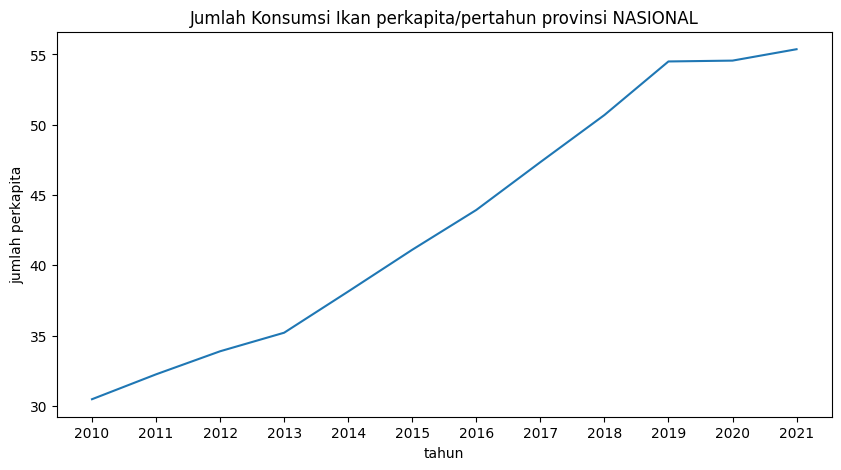

In [43]:
plot_all_provinsi()

##### Lets save dataframe into csv, and move out to tableau for the interactive visualization

In [47]:
df_melt.to_csv('./data/clean/data_konsumsi_ikan.csv', index=False)